# base64 encoding and decoding for an image  
  
This small tutorial shows how to use base64 to store an image as a string inside a json string and then recover it for saving or processing with numpy.

In [1]:
import base64, sys, json
import os, io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#filename='images/img.jpg'
filename='img.jpg'

Load the image and show it

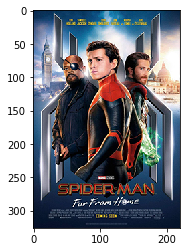

In [2]:
img=mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()


Encode it to **base64**

In [3]:
img_64 = base64.b64encode(open(filename, "rb").read()).decode()
print(img_64[:100])

/9j/4SFyRXhpZgAATU0AKgAAAAgADAEAAAMAAAABF7gAAAEBAAMAAAABIygAAAECAAMAAAADAAAAngEGAAMAAAABAAIAAAESAAMA


store the string of the image in a dictionary to later be treated as a json object

In [4]:
#json_txt = json.dumps({"image_bytes":{"b64": img}})
var_to_send = {'image_64':img_64}
json_txt = json.dumps(var_to_send)

In [5]:
type(json_txt)

str

Here you send the image to other script. Next you recover the image:

In [6]:
json_dic = json.loads(json_txt)
print(json_dic.keys())

dict_keys(['image_64'])


In [7]:
received_img_64 = json_dic.get('image_64',None)
print(received_img_64[:10])

/9j/4SFyRX


Transform the base64 encoded string to bytes

In [8]:
image_bytes = base64.b64decode(received_img_64) #b'\xff\xd8\xff\xe1!rExif\x0

Transform the bytes object to a numpy array for processing

In [9]:
np_img = np.array(Image.open(io.BytesIO(image_bytes))) 
print(np_img.shape)

(326, 220, 3)


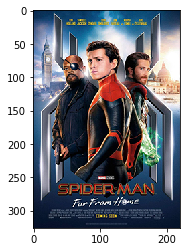

In [10]:
plt.imshow(np_img)
plt.show()

For storing the received file 

In [11]:
save_file='new_file.jpg'
with open(save_file,'wb') as f:
    f.write(image_bytes)